In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
def read_counts2tpm(df):

    result = df
    sample_reads = result.loc[:, result.columns != 'length'].copy()
    gene_len = result.loc[:, ['length']]
    normalize_by_genelength = sample_reads.values / gene_len.values
    scaling_factor = (np.sum(normalize_by_genelength, axis=0).reshape(1, -1))/1e6
    normalize_sequencingdepth = normalize_by_genelength / scaling_factor
    tpm = normalize_sequencingdepth
    return tpm

In [3]:
gene_bed_df = pd.read_csv('../data/results/deseq/allacma_fusca.braker3.genes.bed', 
                        sep = '\t', 
                        header = None,
                        names = ['chrom','start','end','Geneid'])
SBG_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_2/allacma_fusca.DEseq2_results_filtered.tsv', 
                        sep = '\t')
raw_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_2/allacma_fusca.DEseq2_results_raw.tsv', 
                        sep = '\t')
#counts_df = pd.read_csv('../data/results/deseq2/allacma_fusca/v_2/allacma_fusca.DEseq2_counts.tsv',
#                        sep = '\t')
pi_df = pd.read_csv('../data/results/gene_pop/full/allacma_fusca.longest_isoforms.pi.tsv',
                        sep = '\t')
pi_df.columns=['chrom','Geneid','0D_pi','4D_pi','0/4D_pi']


In [4]:
pi_df = pi_df.dropna()
pi_df.replace([np.inf, -np.inf], np.nan, inplace=True)
pi_df['linkage'] = np.where((pi_df['chrom'] == 'OX359249.1' ) | (pi_df['chrom'] == 'OX359250.1'),
                            'X', 'autosome')
chrom_pi = pi_df.groupby('chrom')['4D_pi'].mean().reset_index()

In [5]:
pi_df

,chrom,Geneid,0D_pi,4D_pi,0/4D_pi,linkage
17,OX359245.1,g159,0.040367,0.039855,1.012851,autosome
18,OX359245.1,g160,0.029861,0.047946,0.622810,autosome
19,OX359245.1,g161,0.006424,0.008857,0.725338,autosome
24,OX359245.1,g166,0.000808,0.006363,0.127042,autosome
29,OX359245.1,g171,0.009287,0.039036,0.237912,autosome
...,...,...,...,...,...,...
23180,OX359250.1,g23322,0.000305,0.002969,0.102844,X
23182,OX359250.1,g23324,0.001833,0.012094,0.151592,X
23183,OX359250.1,g23325,0.004356,0.008127,0.535978,X
23191,OX359250.1,g23333,0.005150,0.007917,0.650470,X


In [6]:
AB = [1119221, 983134, 594727, 480592, 154763, 195562]
chrom_pi['length'] = [81897997, 75614292, 66084411, 58810162, 55591601, 48066046]
chrom_pi['callable_length'] = [54030868, 55430720, 54707081, 50199174, 50944876, 41345527]
chrom_pi['het'] = AB/chrom_pi['callable_length']
chrom_pi['0D_pi'] = pi_df.groupby('chrom')['0D_pi'].mean().reset_index()['0D_pi']
chrom_pi

,chrom,4D_pi,length,callable_length,het,0D_pi
0,OX359245.1,0.012822,81897997,54030868,0.020714,0.004319
1,OX359246.1,0.012240,75614292,55430720,0.017736,0.003585
2,OX359247.1,0.008488,66084411,54707081,0.010871,0.002604
3,OX359248.1,0.006215,58810162,50199174,0.009574,0.001797
4,OX359249.1,0.005221,55591601,50944876,0.003038,0.001771
5,OX359250.1,0.006592,48066046,41345527,0.004730,0.002883


/Users/se13/mambaforge/envs/herho/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


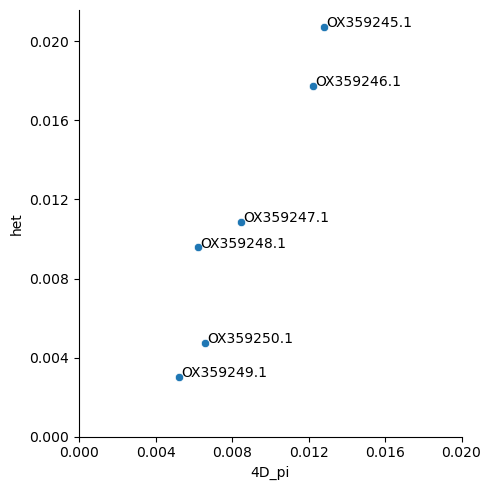

In [7]:
value_tick = np.arange(0, 0.024, 0.004)

g = sns.relplot(data = chrom_pi,
           x = '4D_pi',
           y = 'het')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xticks(ticks=value_tick)
    ax.set_yticks(ticks=value_tick)

    for idx, row in chrom_pi.iterrows():
        x = row['4D_pi']
        y = row['het']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


/Users/se13/mambaforge/envs/herho/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


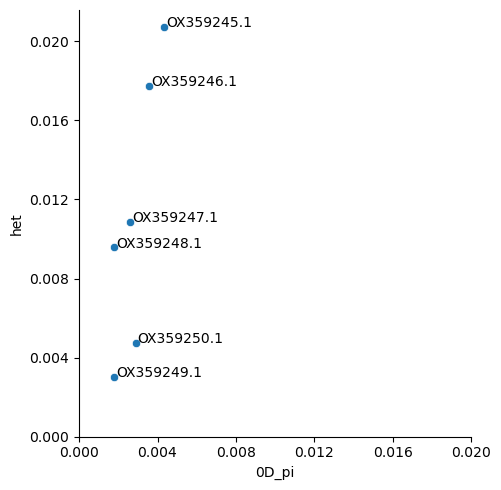

In [8]:
value_tick = np.arange(0, 0.024, 0.004)

g = sns.relplot(data = chrom_pi,
           x = '0D_pi',
           y = 'het')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xticks(ticks=value_tick)
    ax.set_yticks(ticks=value_tick)

    for idx, row in chrom_pi.iterrows():
        x = row['0D_pi']
        y = row['het']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


/Users/se13/mambaforge/envs/herho/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


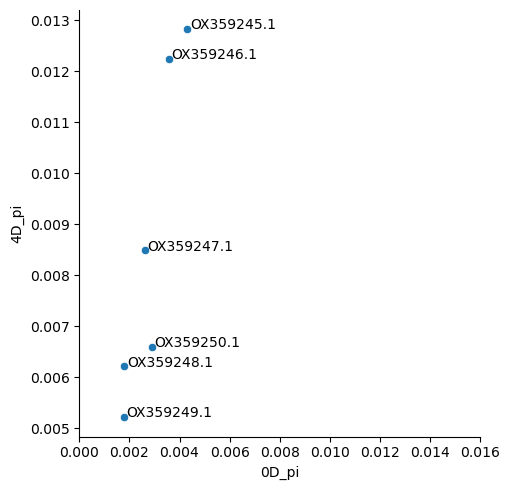

In [9]:
value_tick = np.arange(0, 0.017, 0.002)

g = sns.relplot(data = chrom_pi,
           x = '0D_pi',
           y = '4D_pi')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    ax.set_xticks(ticks=value_tick)
    #ax.set_yticks(ticks=np.arange(0.6, 0.017, 0.02))

    for idx, row in chrom_pi.iterrows():
        x = row['0D_pi']
        y = row['4D_pi']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


/Users/se13/mambaforge/envs/herho/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


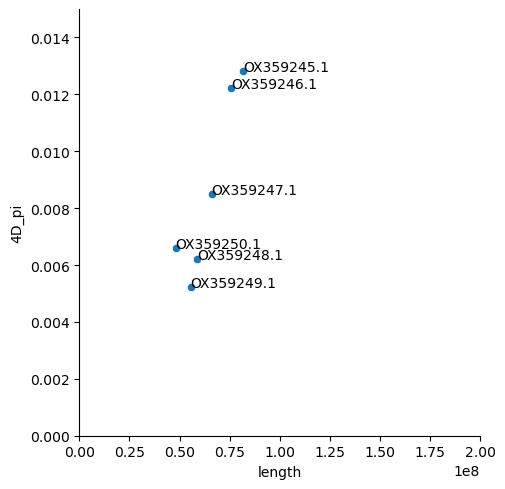

In [10]:
value_tick = np.arange(0, 0.024, 0.004)

g = sns.relplot(data = chrom_pi,
           x = 'length',
           y = '4D_pi')

for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    #ax.set_xticks(ticks=value_tick)
    #ax.set_yticks(ticks=value_tick)
    ax.set_ylim(0, 0.015)
    ax.set_xlim(0, 20e7)

    for idx, row in chrom_pi.iterrows():
        x = row['length']
        y = row['4D_pi']
        text = row['chrom']
        ax.text(x+0.0001,y,text, horizontalalignment='left')


<Axes: xlabel='chrom', ylabel='4D_pi'>

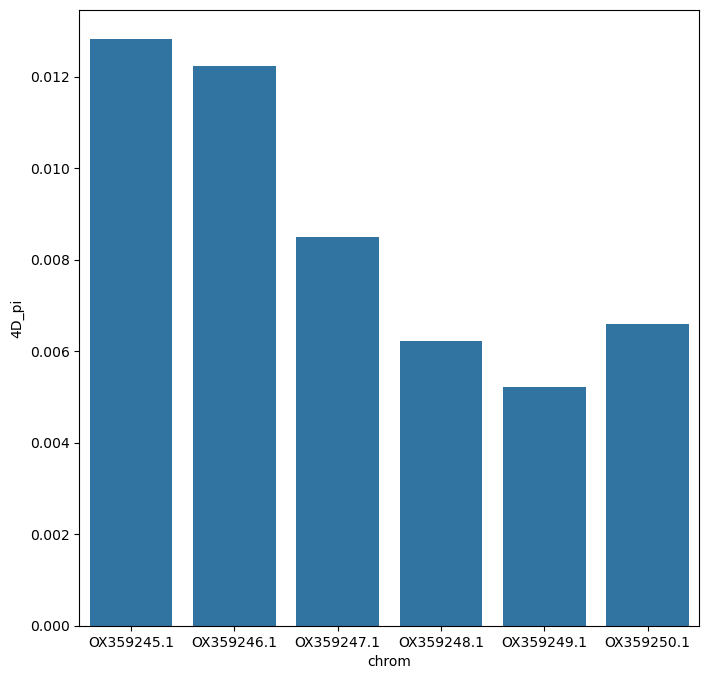

In [11]:
fig, axs = plt.subplots(figsize = (8,8))

sns.barplot(data = chrom_pi,
           x = 'chrom',
           y = '4D_pi',
           color = 'tab:blue')

<Axes: xlabel='chrom', ylabel='het'>

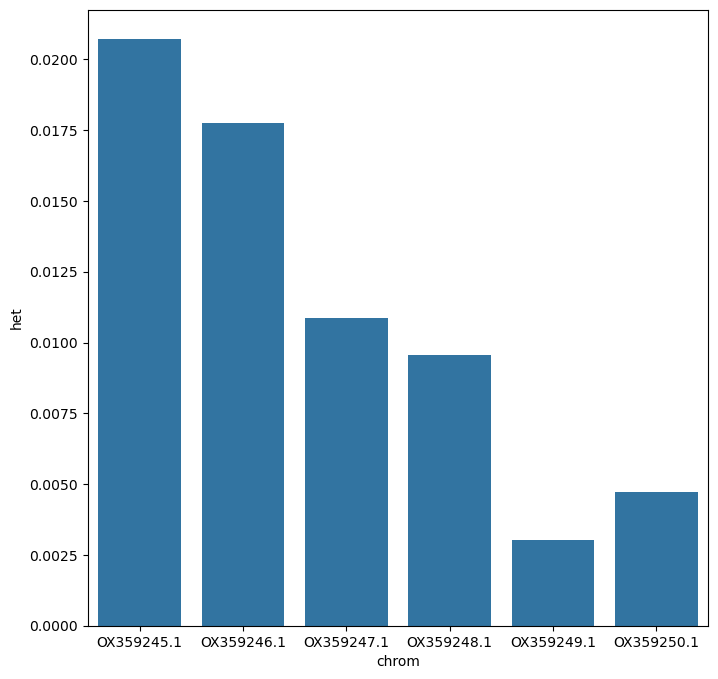

In [12]:
fig, axs = plt.subplots(figsize = (8,8))

sns.barplot(data = chrom_pi,
           x = 'chrom',
           y = 'het',
           color = 'tab:blue')

<Axes: xlabel='chrom', ylabel='0D_pi'>

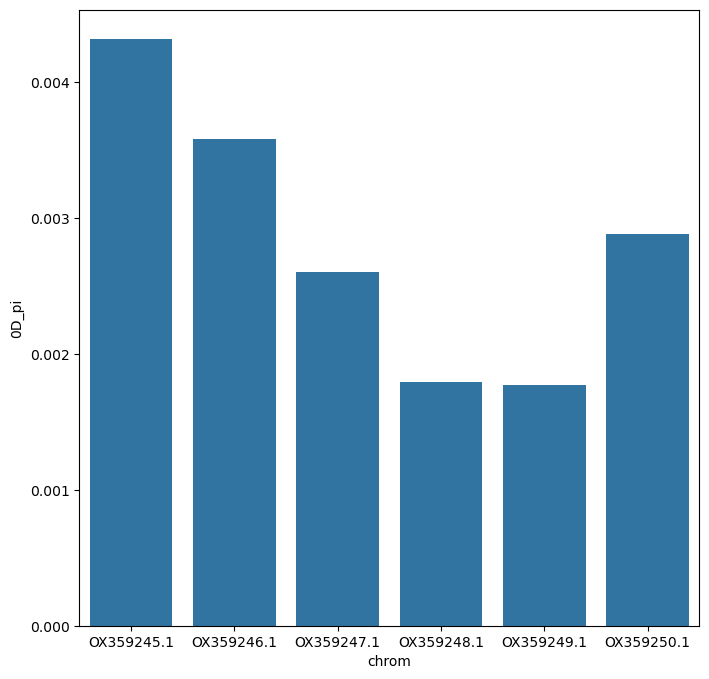

In [13]:
fig, axs = plt.subplots(figsize = (8,8))

sns.barplot(data = chrom_pi,
           x = 'chrom',
           y = '0D_pi',
           color = 'tab:blue')

In [14]:
def ne(theta, mu):
    # theta = 4*Ne*mu
    # Ne = theta / (4*mu)
    return theta / (4*mu)

In [15]:
mu_drosophila = 8.4e-09
mu_heliconius = 2.9e-09
theta = chrom_pi['4D_pi'].mean()
print(ne(theta, mu_drosophila))
print(ne(theta, mu_heliconius))

255843.22406917872
741063.1317865867


In [16]:
(255843 + 741063) / 2

498453.0

In [17]:
sample_names = ['AF_F_1','AF_F_2','AF_F_3','AF_F_4','AF_F_5','AF_F_6','AF_F_7','AF_F_8','AF_F_9','AF_F_10',
    'AF_M_1','AF_M_2','AF_M_3','AF_M_4','AF_M_5','AF_M_6','AF_M_7','AF_M_8','AF_M_9','AF_M_10']

In [18]:
counts_df['length'] = (gene_bed_df['end'] - gene_bed_df['start'])/1000
Geneid = list(counts_df['Geneid'])
Chrom = list(gene_bed_df['chrom'])
counts_df = counts_df.set_index('Geneid')

NameError: name 'counts_df' is not defined

In [19]:
normalised_count_df = pd.DataFrame(read_counts2tpm(counts_df))
normalised_count_df.columns = sample_names
normalised_count_df['Geneid'] = Geneid
normalised_count_df['chrom'] = Chrom
normalised_count_df

NameError: name 'counts_df' is not defined

In [20]:
gene_bed_df

,chrom,start,end,Geneid
0,CAMXBY010000001.1,108891,115370,g1
1,CAMXBY010000002.1,6014,8163,g2
2,CAMXBY010000002.1,76783,79257,g3
3,CAMXBY010000002.1,79882,82431,g4
4,CAMXBY010000002.1,84494,85237,g5
...,...,...,...,...
23331,OX359250.1,47282776,47289429,g23332
23332,OX359250.1,47383685,47424716,g23333
23333,OX359250.1,47561345,47561716,g23334
23334,OX359250.1,47822036,47822625,g23335


In [21]:
gene_bed_df = gene_bed_df.merge(SBG_df[['Geneid','log2FoldChange']], 
                                       how = 'outer',
                                       on = 'Geneid')

In [22]:
gene_bed_df

,chrom,start,end,Geneid,log2FoldChange
0,CAMXBY010000001.1,108891,115370,g1,4.849560
1,CAMXBY010000002.1,6014,8163,g2,5.923193
2,CAMXBY010000002.1,76783,79257,g3,3.816286
3,CAMXBY010000002.1,79882,82431,g4,2.918714
4,CAMXBY010000002.1,84494,85237,g5,NaN
...,...,...,...,...,...
23331,OX359250.1,47282776,47289429,g23332,1.378971
23332,OX359250.1,47383685,47424716,g23333,9.610051
23333,OX359250.1,47561345,47561716,g23334,4.961702
23334,OX359250.1,47822036,47822625,g23335,NaN


In [23]:
bias_conditions = [
    (gene_bed_df['log2FoldChange'] > 0),
    (gene_bed_df['log2FoldChange'] < 0)]
bias_outcomes = ['male_biased', 'female_biased']
gene_bed_df['bias'] = np.select(bias_conditions, bias_outcomes, default='unbiased')

In [24]:
gene_bed_df

,chrom,start,end,Geneid,log2FoldChange,bias
0,CAMXBY010000001.1,108891,115370,g1,4.849560,male_biased
1,CAMXBY010000002.1,6014,8163,g2,5.923193,male_biased
2,CAMXBY010000002.1,76783,79257,g3,3.816286,male_biased
3,CAMXBY010000002.1,79882,82431,g4,2.918714,male_biased
4,CAMXBY010000002.1,84494,85237,g5,NaN,unbiased
...,...,...,...,...,...,...
23331,OX359250.1,47282776,47289429,g23332,1.378971,male_biased
23332,OX359250.1,47383685,47424716,g23333,9.610051,male_biased
23333,OX359250.1,47561345,47561716,g23334,4.961702,male_biased
23334,OX359250.1,47822036,47822625,g23335,NaN,unbiased


In [25]:
chromosomes = ['OX359245.1',
 'OX359246.1',
 'OX359247.1',
 'OX359248.1',
 'OX359249.1',
 'OX359250.1']

chrom_df = gene_bed_df[gene_bed_df['chrom'].isin(chromosomes)]

In [26]:
chrom_df

,chrom,start,end,Geneid,log2FoldChange,bias
141,OX359245.1,5649,6038,g142,NaN,unbiased
142,OX359245.1,9747,10221,g143,NaN,unbiased
143,OX359245.1,16973,17362,g144,NaN,unbiased
144,OX359245.1,21071,21545,g145,NaN,unbiased
145,OX359245.1,28297,28686,g146,NaN,unbiased
...,...,...,...,...,...,...
23331,OX359250.1,47282776,47289429,g23332,1.378971,male_biased
23332,OX359250.1,47383685,47424716,g23333,9.610051,male_biased
23333,OX359250.1,47561345,47561716,g23334,4.961702,male_biased
23334,OX359250.1,47822036,47822625,g23335,NaN,unbiased


In [27]:
chrom_df.to_csv('../data/results/deseq2/allacma_fusca/v_2/allacma_fusca.gene_bias.chromosomes.tsv', sep = '\t', index=None)

In [28]:
#pi_df['Geneid'] = [gene.replace('g','g_') for gene in pi_df['Geneid'].to_list()]
#pi_df = pi_df[pi_df['Geneid'].isin(Geneid)]
pi_df = pi_df.merge(chrom_df[['Geneid','bias']], how='outer', on = 'Geneid').dropna()

In [29]:
pi_df

,chrom,Geneid,0D_pi,4D_pi,0/4D_pi,linkage,bias
0,OX359245.1,g159,0.040367,0.039855,1.012851,autosome,unbiased
1,OX359245.1,g160,0.029861,0.047946,0.622810,autosome,unbiased
2,OX359245.1,g161,0.006424,0.008857,0.725338,autosome,unbiased
3,OX359245.1,g166,0.000808,0.006363,0.127042,autosome,unbiased
4,OX359245.1,g171,0.009287,0.039036,0.237912,autosome,unbiased
...,...,...,...,...,...,...,...
9968,OX359250.1,g23322,0.000305,0.002969,0.102844,X,unbiased
9969,OX359250.1,g23324,0.001833,0.012094,0.151592,X,unbiased
9970,OX359250.1,g23325,0.004356,0.008127,0.535978,X,unbiased
9971,OX359250.1,g23333,0.005150,0.007917,0.650470,X,male_biased


In [30]:
chrom_df.dropna().groupby(['chrom'])['bias'].value_counts()

chrom       bias         
OX359245.1  male_biased      1017
            female_biased     500
OX359246.1  male_biased       958
            female_biased     520
OX359247.1  male_biased      1098
            female_biased     523
OX359248.1  male_biased       885
            female_biased     456
OX359249.1  male_biased       839
            female_biased     314
OX359250.1  male_biased       974
            female_biased     189
Name: count, dtype: int64

In [31]:
chrom_df.groupby(['chrom'])['bias'].value_counts(normalize='True')

chrom       bias         
OX359245.1  unbiased         0.651825
            male_biased      0.233417
            female_biased    0.114758
OX359246.1  unbiased         0.678696
            male_biased      0.208261
            female_biased    0.113043
OX359247.1  unbiased         0.656277
            male_biased      0.232824
            female_biased    0.110899
OX359248.1  unbiased         0.653040
            male_biased      0.228978
            female_biased    0.117982
OX359249.1  unbiased         0.617832
            male_biased      0.278091
            female_biased    0.104077
OX359250.1  unbiased         0.559470
            male_biased      0.368939
            female_biased    0.071591
Name: proportion, dtype: float64

In [32]:
chrom_df['bias'].value_counts(normalize='True')

bias
unbiased         0.643328
male_biased      0.248804
female_biased    0.107868
Name: proportion, dtype: float64

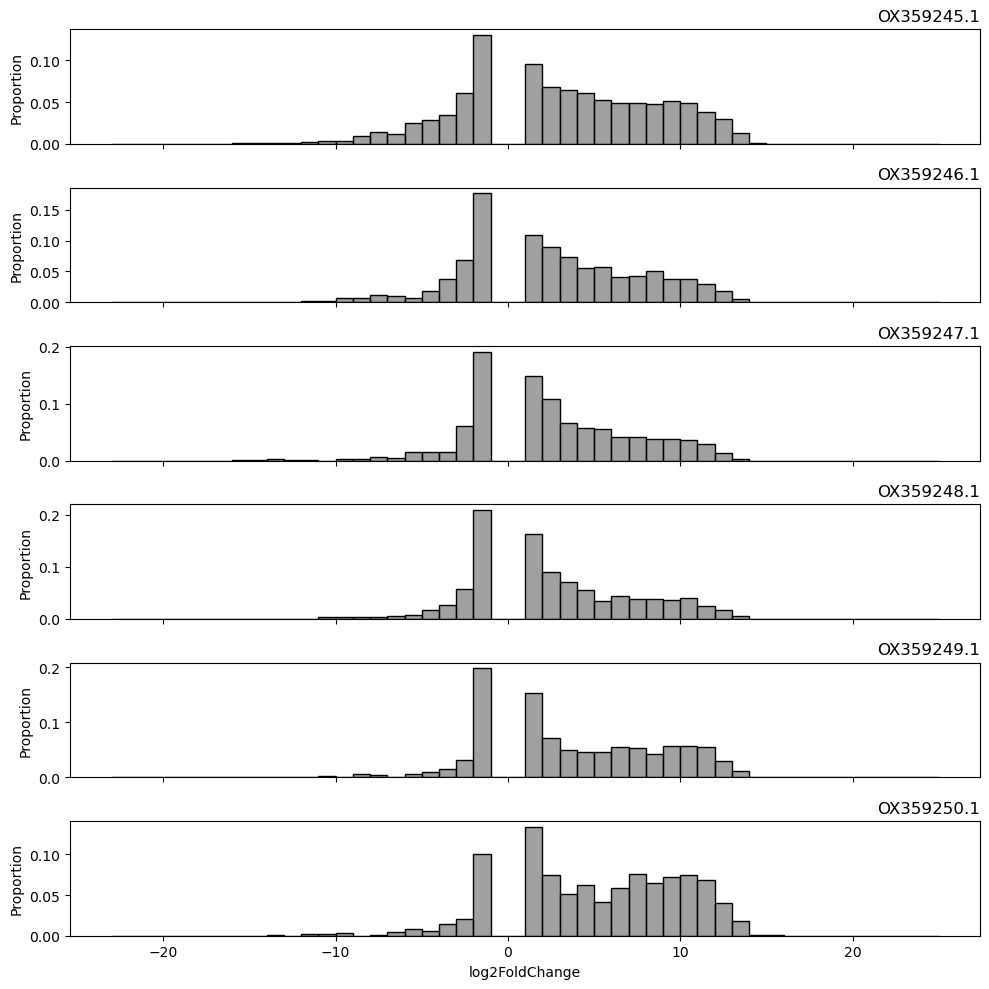

In [33]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):
    
    sns.histplot(chrom_df[chrom_df['chrom']==chrom]['log2FoldChange'],
                color = 'grey',
                stat = 'proportion',
                bins = np.arange(-23, 26, 1),
                ax = axs[i])
    axs[i].set_title(chrom, loc = 'right')
    

plt.tight_layout()

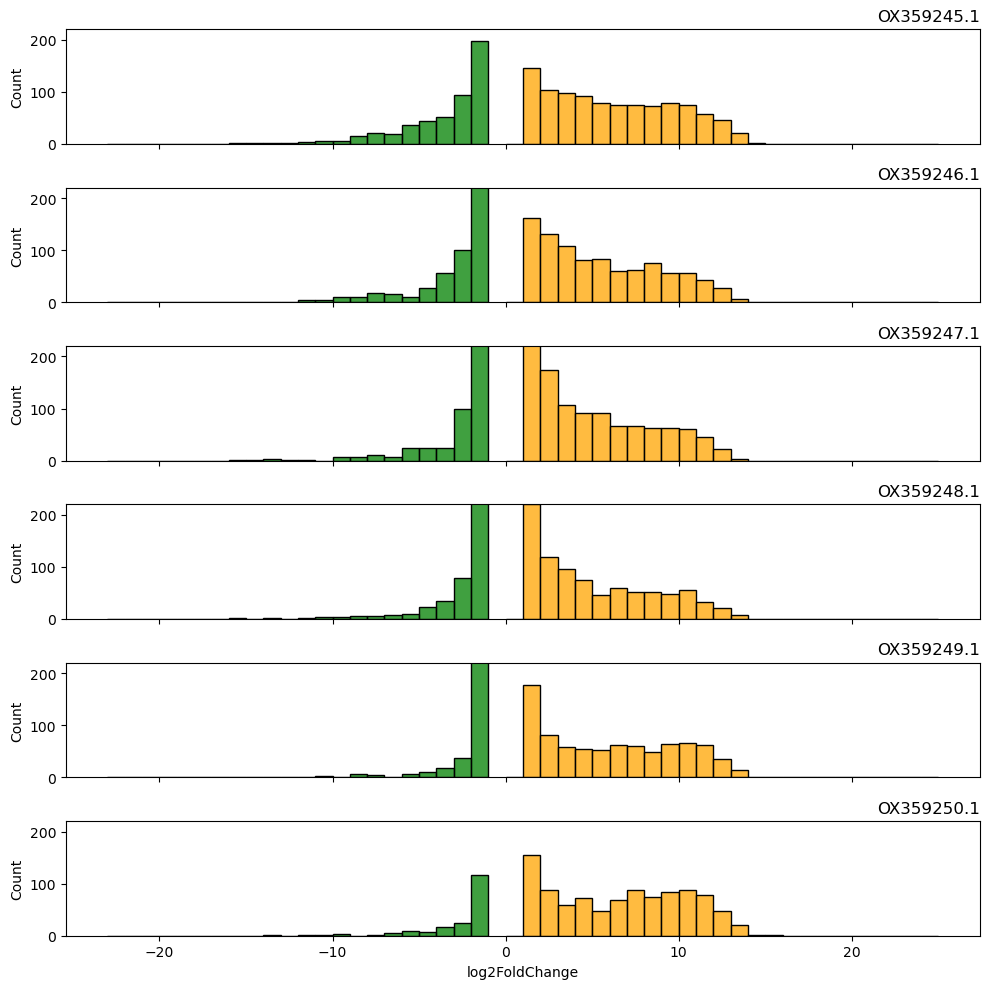

In [34]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']<=-1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(-23, 0, 1),
                color = 'green',
                ax = axs[i])
    axs[i].set_title(chrom, loc = 'right')
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']>=1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(0, 26, 1),
                color = 'orange',
                ax = axs[i])
    
    axs[i].set_title(chrom, loc = 'right')
    axs[i].set_ylim(0, 220)
    

plt.tight_layout()

In [57]:
pwd

'/Users/se13/workspace/projects/springtail_haploid_selection/scripts'

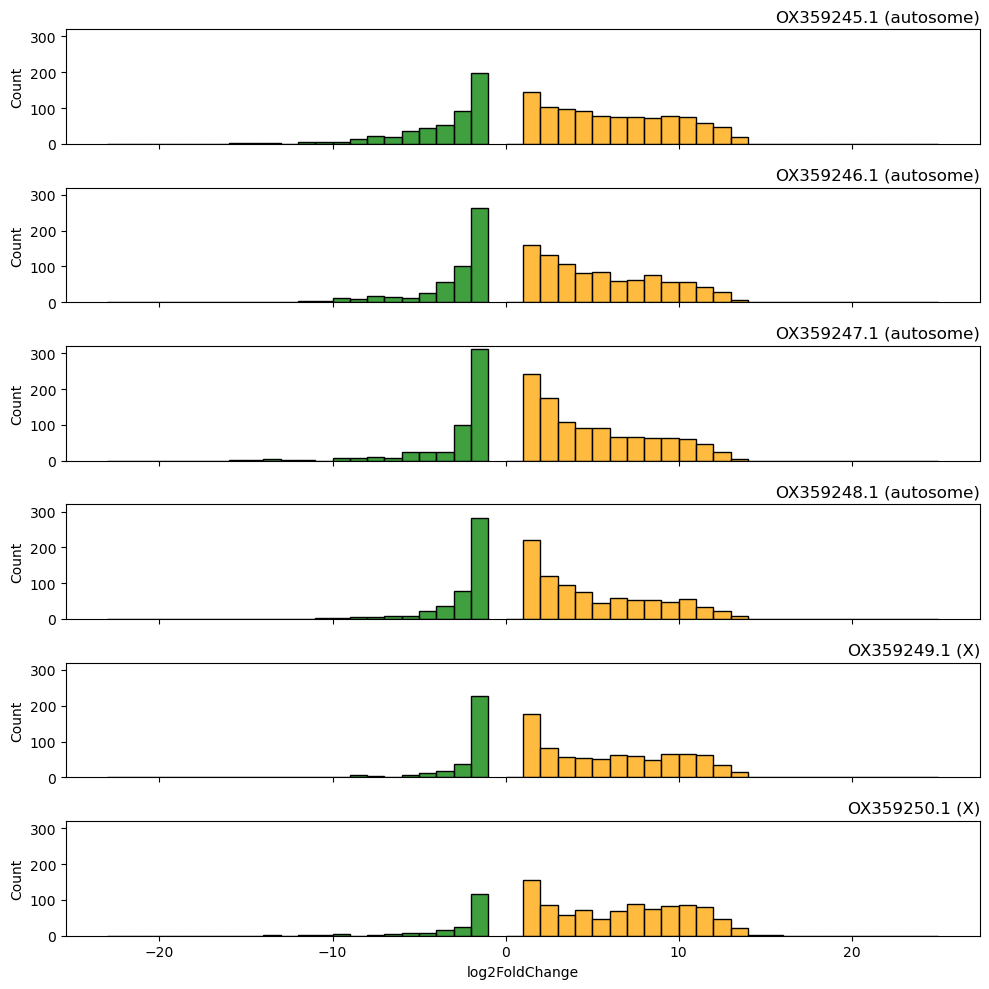

In [56]:
fig, axs = plt.subplots(nrows = 6, sharex=True, figsize = (10,10))

for i, chrom in enumerate(chromosomes):

    if chrom in chromosomes[0:4]:
        title = chrom + ' (autosome)'
    else:
        title = chrom + ' (X)'
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']<=-1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(-23, 0, 1),
                color = 'green',
                ax = axs[i])
    axs[i].set_title(title, loc = 'right')
    
    sns.histplot(chrom_df[(chrom_df['chrom']==chrom) & (chrom_df['log2FoldChange']>=1)]['log2FoldChange'],
                stat = 'count',
                bins = np.arange(0, 26, 1),
                color = 'orange',
                ax = axs[i])
    
    axs[i].set_title(title, loc = 'right')
    axs[i].set_ylim(0, 320)
    

plt.tight_layout()

plt.savefig('bias_dist.svg', format='svg')

In [46]:
barplot_df_count = chrom_df.groupby(['chrom'])['bias'].value_counts().reset_index()
barplot_df_prop = chrom_df.groupby(['chrom'])['bias'].value_counts(normalize='True').reset_index()

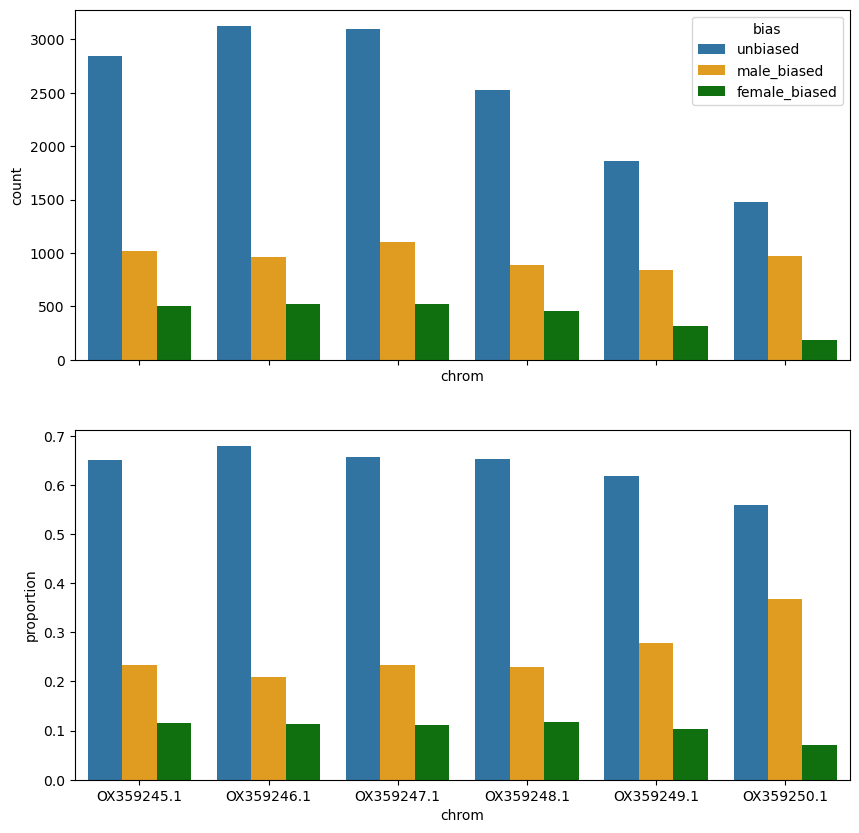

In [55]:
fig, axs = plt.subplots(nrows = 2, sharex=True, figsize = (10,10))

sns.barplot(data=barplot_df_count, 
            x="chrom", 
            y="count",
            hue="bias",
            palette = ['tab:blue','orange','green'],
            ax = axs[0])

sns.barplot(data=barplot_df_prop, 
            x="chrom", 
            y="proportion",
            hue='bias',
            palette = ['tab:blue','orange','green'],
            ax = axs[1])

axs[1].legend().set_visible(False)

plt.savefig('bias_bars.svg', format='svg')

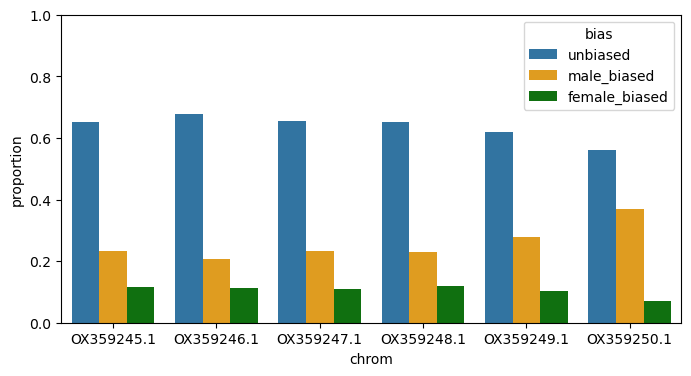

In [58]:
fig, axs = plt.subplots(nrows = 1, sharex=True, figsize = (8,4))

sns.barplot(data=barplot_df_prop, 
            x="chrom", 
            y="proportion",
            hue='bias',
            palette = ['tab:blue','orange','green'],
            ax = axs)

#axs.legend().set_visible(False)
axs.set_ylim([0,1])

plt.savefig('bias_bars_proponly.svg', format='svg')

In [ ]:
ncc_df = normalised_count_df[normalised_count_df['chrom'].isin(chromosomes)]
ncc_ex_df = ncc_df[sample_names].apply(lambda x: [y if y >= 1 else np.nan for y in x])
ncc_ex_df['Geneid'] = ncc_df['Geneid']
ncc_ex_df['chrom'] = ncc_df['chrom']

In [ ]:
females = sample_names[0:10]
females.remove('AF_F_5')
males = sample_names[10:]

In [ ]:
ncc_ex_df['female_mean_TPM'] = ncc_ex_df[females].mean(axis=1)
ncc_ex_df['male_mean_TPM'] = ncc_ex_df[males].mean(axis=1)

In [ ]:
ncc_ex_df[['chrom','AF_F_8']].groupby('chrom').describe()

In [ ]:
ncc_ex_df[['chrom','AF_M_8']].groupby('chrom').describe()

In [ ]:
count_matrix = ncc_ex_df.groupby('chrom')[sample_names].mean()
sex_count_matrix = ncc_ex_df.groupby('chrom')[['female_mean_TPM','male_mean_TPM']].mean()

In [ ]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = count_matrix)
axs.set_title('TPM mean (for TPM > 1)', loc = 'right')

In [ ]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = sex_count_matrix)
axs.set_title('TPM mean', loc = 'right')

In [ ]:
print('Female X1/mean(A)')
print(sex_count_matrix['female_mean_TPM'][4]/np.mean(sex_count_matrix['female_mean_TPM'][:4]))
print('Female X2/mean(A)')
print(sex_count_matrix['female_mean_TPM'][5]/np.mean(sex_count_matrix['female_mean_TPM'][:4]))
print('Male X1/mean(A)')
print(sex_count_matrix['male_mean_TPM'][4]/np.mean(sex_count_matrix['male_mean_TPM'][:4]))
print('Male X2/mean(A)')
print(sex_count_matrix['male_mean_TPM'][5]/np.mean(sex_count_matrix['male_mean_TPM'][:4]))

In [ ]:
female_ratio_matrix = sex_count_matrix['female_mean_TPM'].to_numpy()[:, None]/sex_count_matrix['female_mean_TPM'].to_numpy()[None,:]
male_ratio_matrix = sex_count_matrix['male_mean_TPM'].to_numpy()[:, None]/sex_count_matrix['male_mean_TPM'].to_numpy()[None,:]

In [ ]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = female_ratio_matrix)
axs.set_title('Ratio', loc = 'right')

In [ ]:
fig, axs = plt.subplots(nrows = 1, figsize = (10,10))

sns.heatmap(data = male_ratio_matrix)
axs.set_title('Ratio', loc = 'right')

In [ ]:
fig, axs = plt.subplots(nrows = 1, figsize = (8,8))

sns.histplot(data = ncc_df[ncc_df['AF_F_1'] > 100],
             x = 'AF_F_1',
             hue = 'chrom',
             bins = 100,
             stat = 'count')

In [ ]:
pi_df

In [ ]:
pi_df['0/4D_pi'].describe()

In [ ]:
sns.histplot(pi_df['0/4D_pi'])

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (10,10), sharex=True)

x_upper = 2.5
x_lower = 0
y_upper = 0.2
y_lower = 0
n_bins = 25
bins = np.arange(x_lower,x_upper,(x_upper-x_lower)/n_bins)

stat = 'count'

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='autosome')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             ax = axs[0][0])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='autosome')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             ax = axs[1][0])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='autosome')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='green',
             ax = axs[2][0])

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='X')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             label = 'Unbiased',
             ax = axs[0][1])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='X')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             label = 'Male biased',
             ax = axs[1][1])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='X')],
             x = '0/4D_pi',
             stat=stat,
             bins=bins,
             color='green',
             label = 'Female biased',
             ax = axs[2][1])

for i in range(3):
    axs[i][0].set_xlim(x_lower, x_upper)
    axs[i][1].set_xlim(x_lower, x_upper)
    
    #axs[i][0].set_ylim(y_lower, y_upper)
    #axs[i][1].set_ylim(y_lower, y_upper)
    
    axs[i][0].set_xlabel('0D/4D pi (autosome)')
    axs[i][1].set_xlabel('0D/4D pi (X)')
    
    axs[i][1].legend()
    
#plt.xticks(np.arange(x_lower, x_upper, x_upper/7))

In [ ]:
fig, axs = plt.subplots(nrows = 3, ncols=2, figsize = (10,10), sharex=True)

x_upper = 0.05
x_lower = 0
y_upper = 0.2
y_lower = 0
n_bins = 25
bins = np.arange(x_lower,x_upper,(x_upper-x_lower)/n_bins)

stat = 'count'

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='autosome')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             ax = axs[0][0])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='autosome')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             ax = axs[1][0])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='autosome')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             color='green',
             ax = axs[2][0])

sns.histplot(data = pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='X')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             label = 'Unbiased',
             ax = axs[0][1])

sns.histplot(data = pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='X')],
             x = '0D_pi',
             stat=stat,
             bins=bins,
             color='orange',
             label = 'Male biased',
             ax = axs[1][1])

sns.histplot(data = pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='X')],
             x = '4D_pi',
             stat=stat,
             bins=bins,
             color='green',
             label = 'Female biased',
             ax = axs[2][1])

for i in range(3):
    axs[i][0].set_xlim(x_lower, x_upper)
    axs[i][1].set_xlim(x_lower, x_upper)
    
    #axs[i][0].set_ylim(y_lower, y_upper)
    #axs[i][1].set_ylim(y_lower, y_upper)
    
    axs[i][0].set_xlabel('0D/4D pi (autosome)')
    axs[i][1].set_xlabel('0D/4D pi (X)')
    
    axs[i][1].legend()
    
#plt.xticks(np.arange(x_lower, x_upper, x_upper/7))

In [ ]:
pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='autosome')].shape[0]

In [ ]:
pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='autosome')].shape[0]

In [ ]:
pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='autosome')].shape[0]

In [ ]:
pi_df[(pi_df['bias']=='unbiased') & (pi_df['linkage']=='X')].shape[0]

In [ ]:
pi_df[(pi_df['bias']=='male_biased') & (pi_df['linkage']=='X')].shape[0]

In [ ]:
pi_df[(pi_df['bias']=='female_biased') & (pi_df['linkage']=='X')].shape[0]

In [ ]:
print(pi_df[pi_df['linkage']=='autosome']['4D_pi'].mean())
print(pi_df[pi_df['chrom']=='OX359249.1']['4D_pi'].describe())
print(pi_df[pi_df['chrom']=='OX359250.1']['4D_pi'].describe())

In [ ]:
sns.histplot(pi_df[pi_df['chrom']=='OX359249.1']['4D_pi'])

In [ ]:
sns.histplot(pi_df[pi_df['chrom']=='OX359250.1']['4D_pi'])

In [ ]:
chromosomes

In [ ]:
fig, axs = plt.subplots(nrows=6, figsize = (10,10), sharex=True)

bins = np.arange(0, 0.05, 0.005)

for i, chrom in enumerate(chromosomes):
    sns.histplot(pi_df[pi_df['chrom']==chrom]['4D_pi'],
                ax = axs[i],
                bins = bins)
    
axs[5].set_xlim(0, 0.05)

In [ ]:
fig, axs = plt.subplots(nrows=6, figsize = (10,10), sharex=True)

bins = np.arange(-10, 0.5, 0.5)

for i, chrom in enumerate(chromosomes):
    sns.histplot(np.log(pi_df[pi_df['chrom']==chrom]['4D_pi']),
                ax = axs[i],
                bins = bins)
    
    axs[i].set_title(chrom, loc = 'right')

axs[5].set_xlabel('log(4D_pi)')

plt.tight_layout()

In [ ]:
pi_df['log_4D_pi'] = np.log10(pi_df['4D_pi'])
pi_df['log_0/4D_pi'] = np.log10(pi_df['0/4D_pi'])
pi_df['log_0/4D_pi/0/4D_pi'] = pi_df['log_0/4D_pi']/pi_df['log_4D_pi']
pi_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
pi_df['log_0/4D_pi/0/4D_pi'].mean()

In [ ]:
fig, axs = plt.subplots( figsize = (10,10))

sns.histplot(pi_df['log_0/4D_pi/0/4D_pi'])
axs.axvline(x=pi_df['log_0/4D_pi/0/4D_pi'].mean(), color = 'black')
'lower the β value the more skewed the distribution, with many weakly deleterious and only a few very strongly deleterious mutations'

In [ ]:
pi_df

In [ ]:
pi_df[pi_df['chrom'].isin(['OX359249.1','OX359250.1'])]['bias'].value_counts(normalize=True)

In [ ]:
pi_df[pi_df['chrom'].isin(['OX359245.1','OX359246.1','OX359247.1','OX359248.1'])]['bias'].value_counts(normalize=True)

In [ ]:
pi_df['bias'].value_counts(normalize=True)

In [ ]:
n = 1028
u = 0.742167
m = 0.180093
f = 0.077740
obs = 0.297

In [ ]:
def resample_bias(n, frequency):
    return sum([True if random.random() <= frequency else False for _ in range(n)])/n

In [ ]:
result_dist = [resample_bias(n, m) for _ in range(10000)]
plt.hist(result_dist, color='grey', bins = 25)
plt.axvline(m, color='blue')
plt.axvline(obs, color='red')
print(f' The observed proportion of X-linked male-biased genes is {round((obs-m)/np.std(result_dist), 2)} standard deviations higher than the resampled distribution')

In [ ]:
plt.hist([result-m for result in result_dist], color='grey', bins = 25)
plt.axvline(0, color='blue')
plt.axvline(0.297-m, color='red')